# Preparation

In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import tikzplotlib
import sys
sys.path += ["/Users/yousuf/Workspace/dissertation/code/rPPG/python/core/"]
sys.path

['/Users/yousuf/Workspace/dissertation/code',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python37.zip',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/Users/yousuf/Library/Python/3.7/lib/python/site-packages',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7/site-packages',
 '/Library/Python/3.7/site-packages',
 '/Users/yousuf/Library/Python/3.7/lib/python/site-packages/IPython/extensions',
 '/Users/yousuf/.ipython',
 '/Users/yousuf/Workspace/dissertation/code/rPPG/python/core/']

In [2]:
import hr_eval
import numpy as np
import tikzplotlib as tikz
prep = "/Users/yousuf/Workspace/dissertation/report/preparation/"
examples_path = "/Users/yousuf/Workspace/dissertation/code/examples/"  
ecg_path = examples_path + "2_stat_1.edf"
ecg, sf= hr_eval.get_ecg_signal(ecg_path)
start = 20000
ecg = ecg[start:]
fig, ax = plt.subplots(figsize=(10,5))
time = np.arange(len(ecg))/sf
ax.plot(time, ecg)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (arb.)")

# tikz.save(prep+"ecg.tex")

ModuleNotFoundError: No module named 'hr_eval'

/Users/yousuf/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/Users/yousuf/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/Users/yousuf/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`

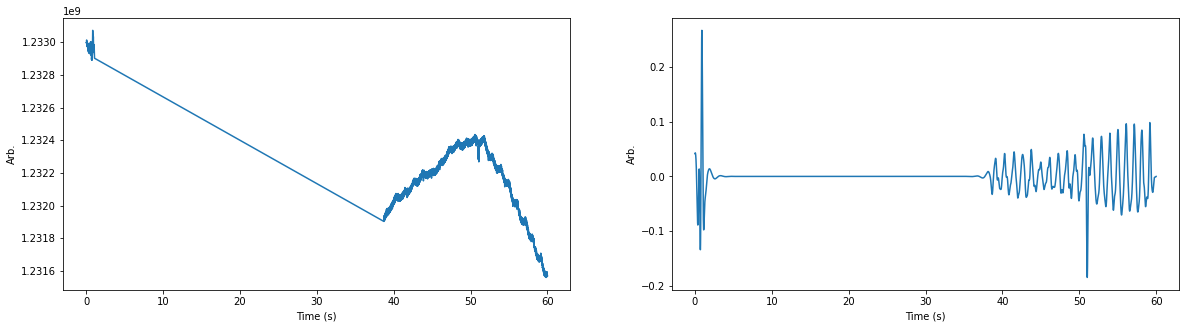

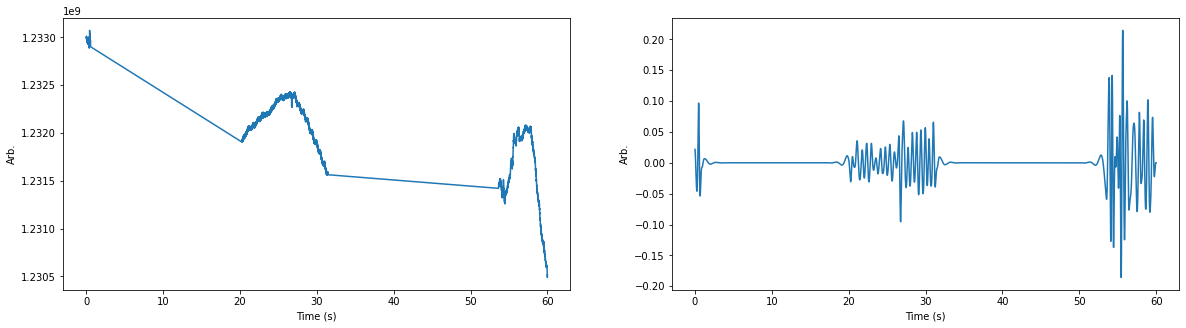

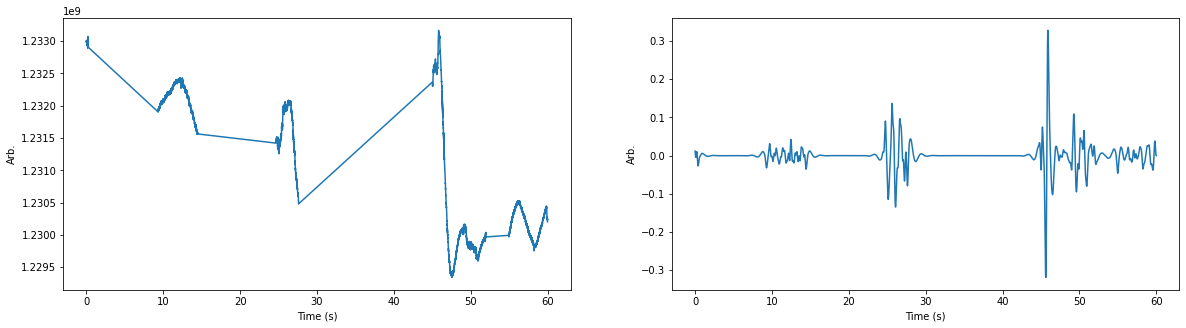

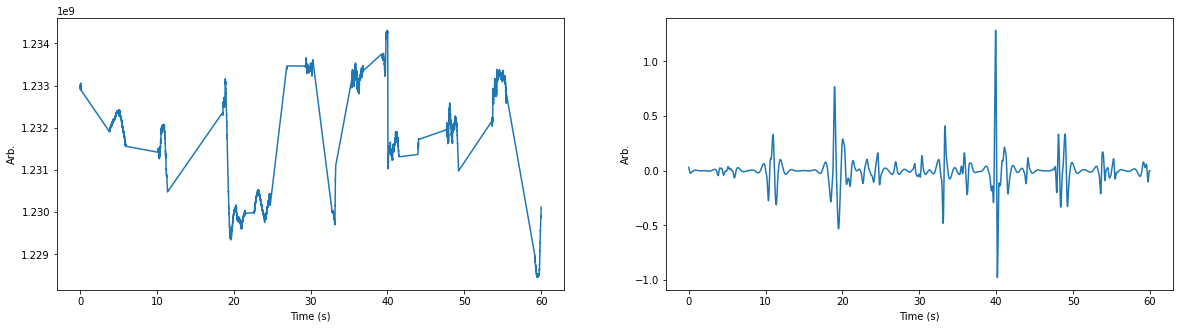

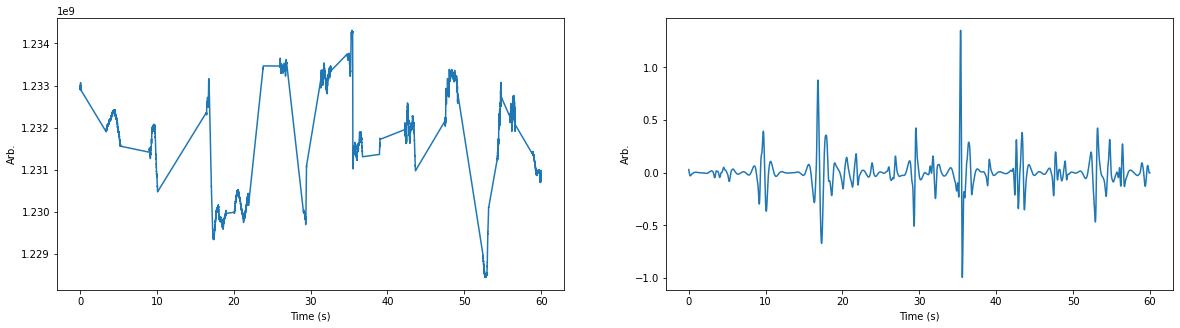

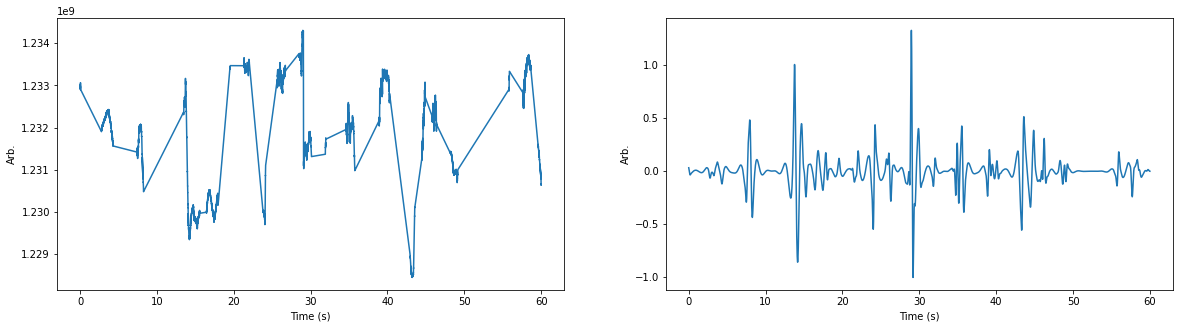

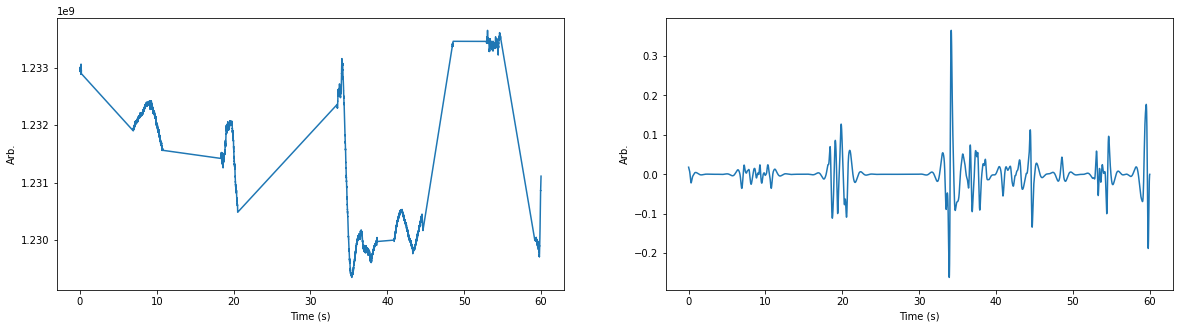

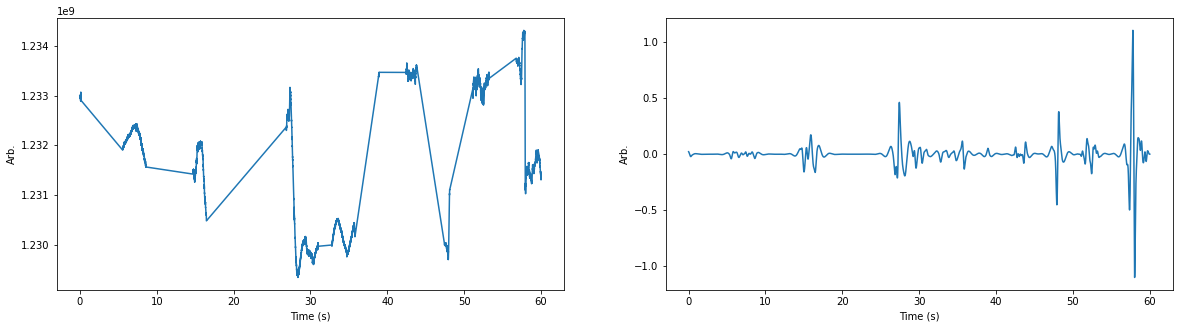

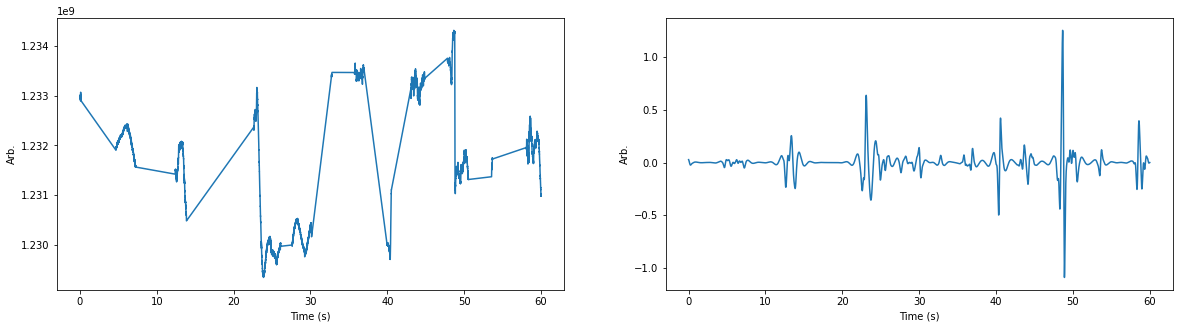

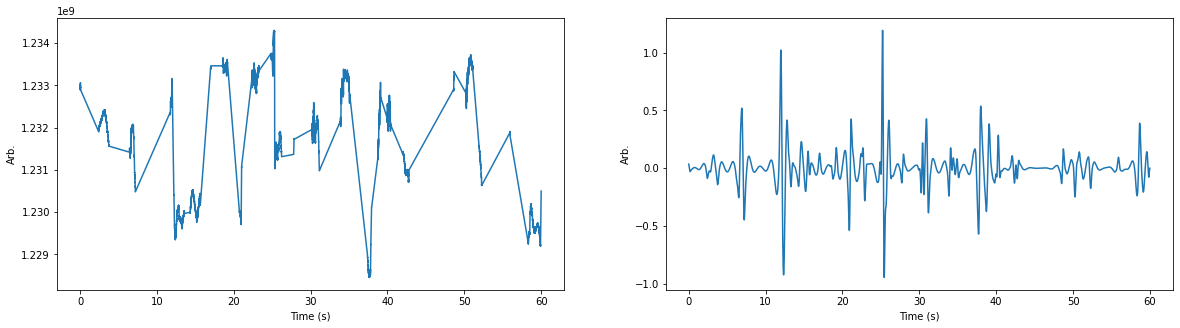

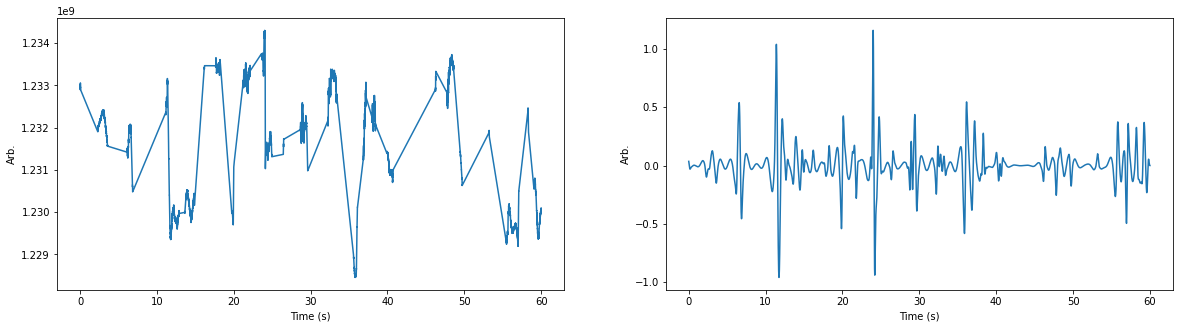

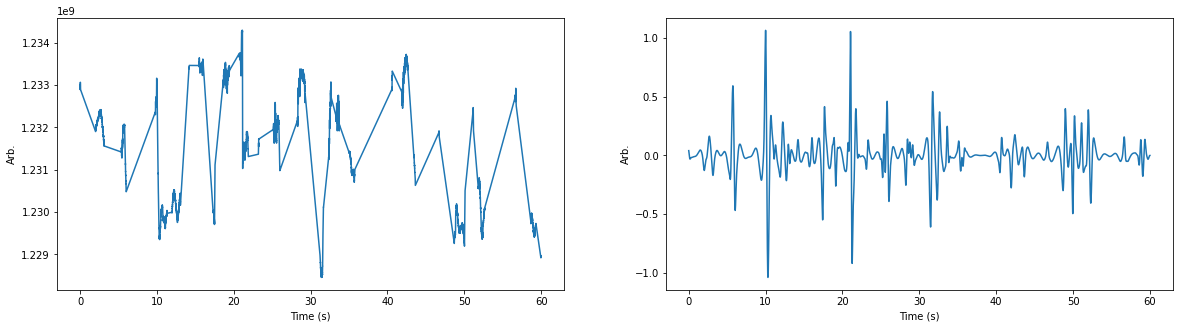

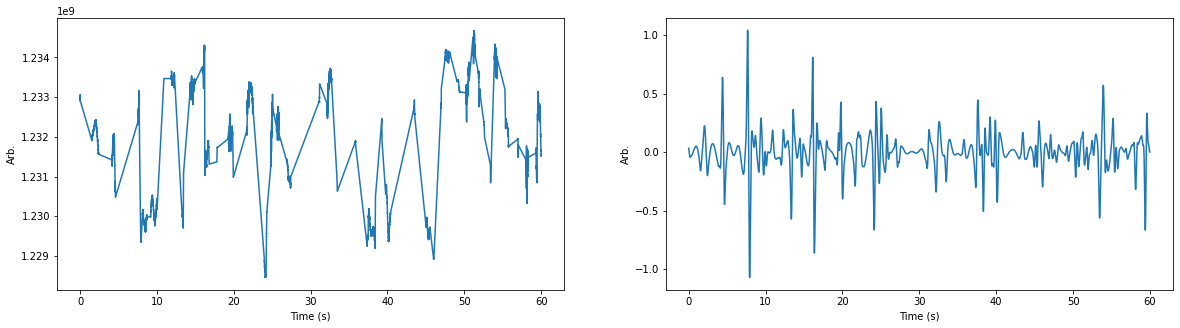

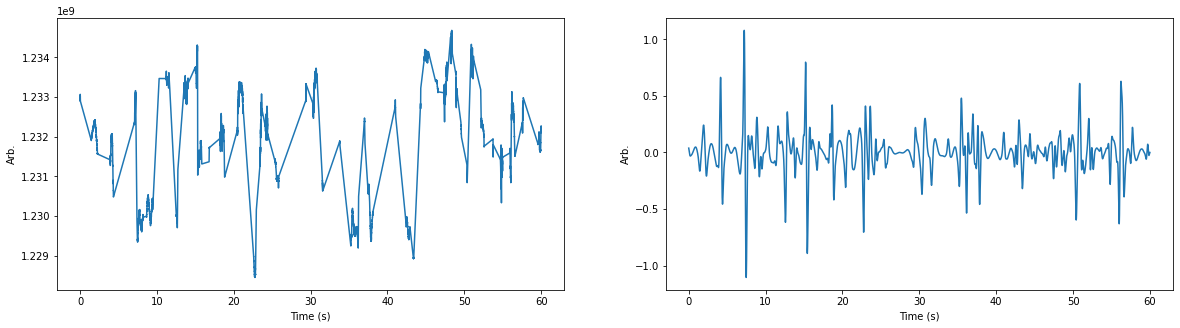

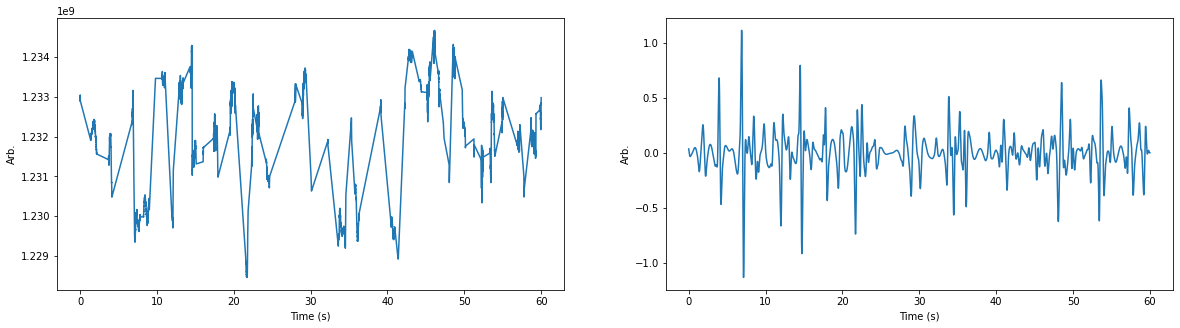

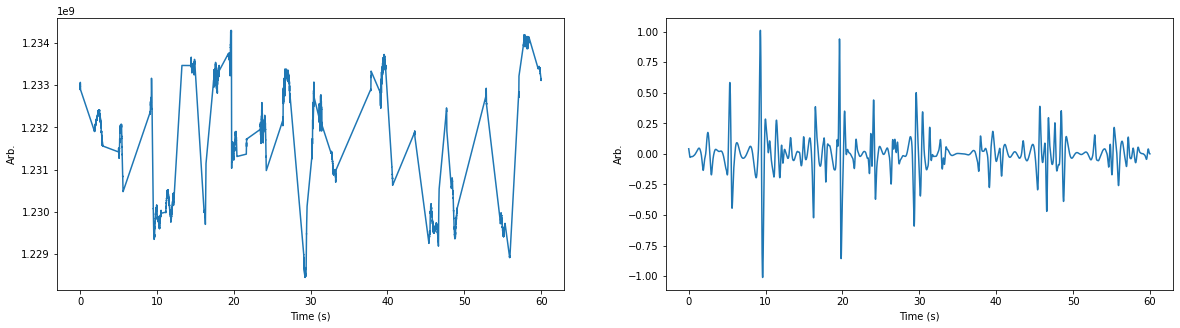

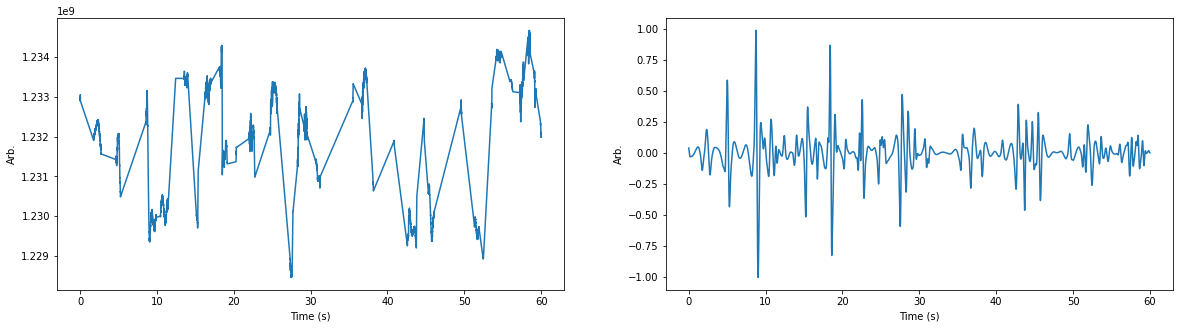

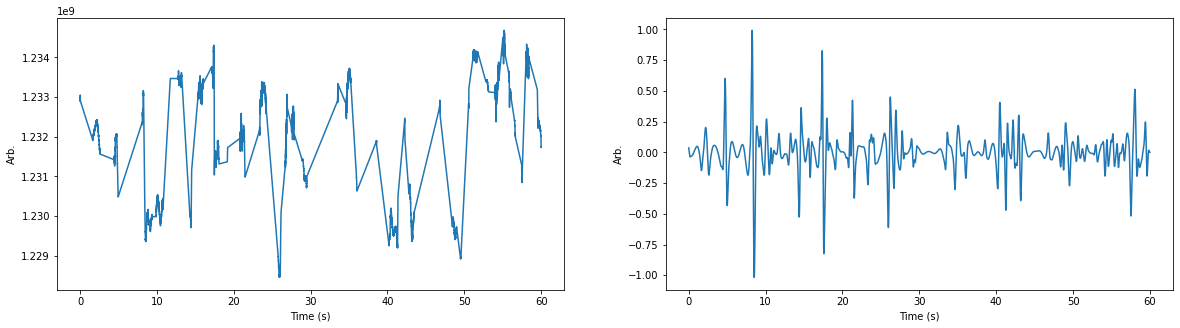

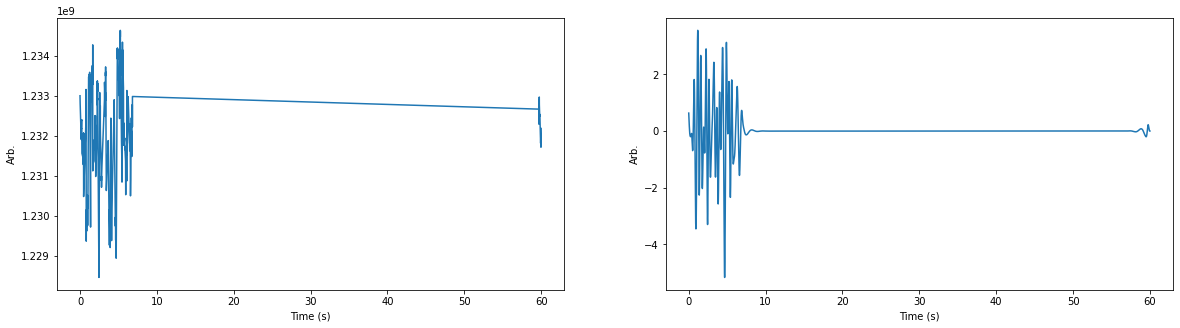

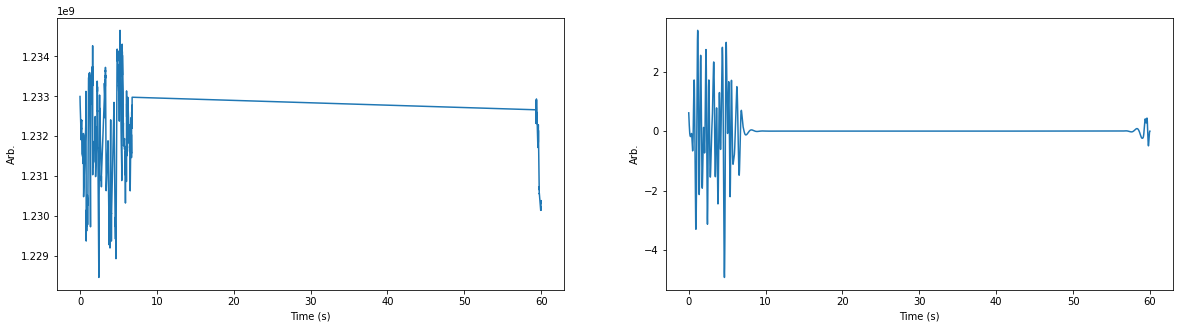

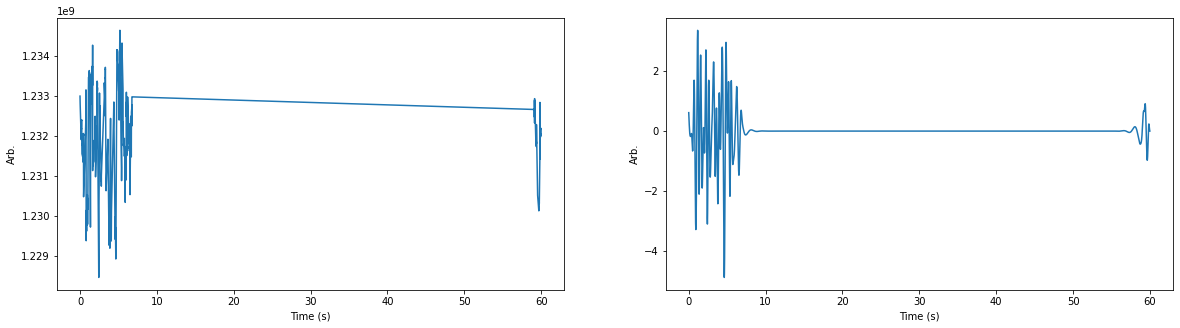

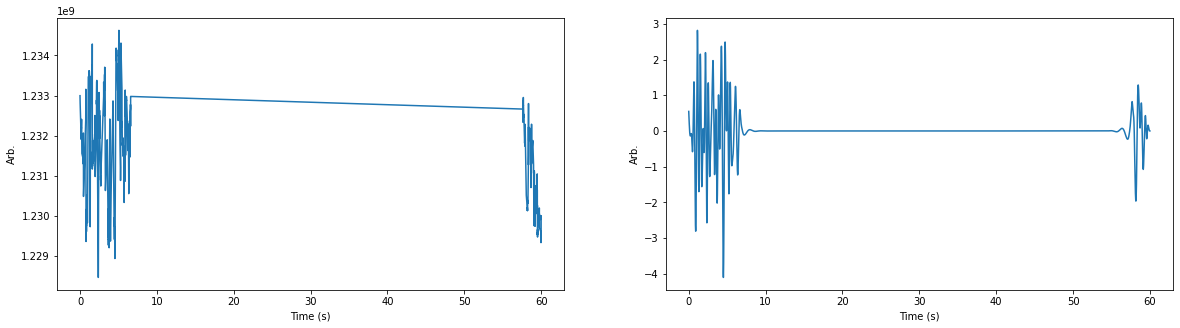

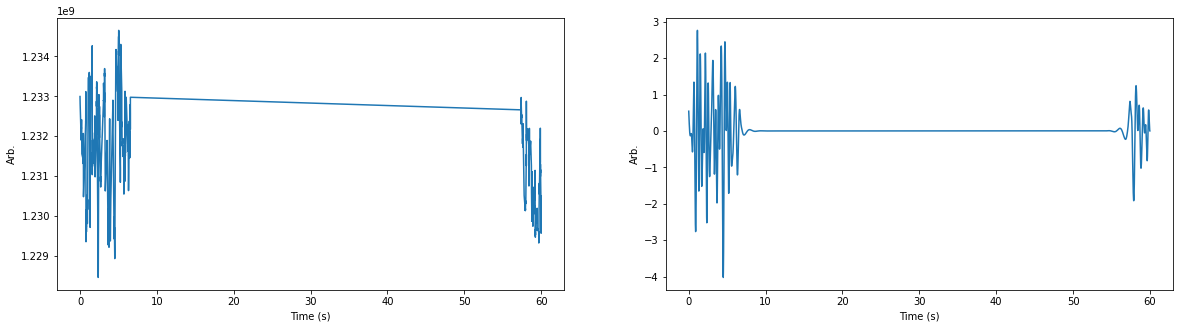

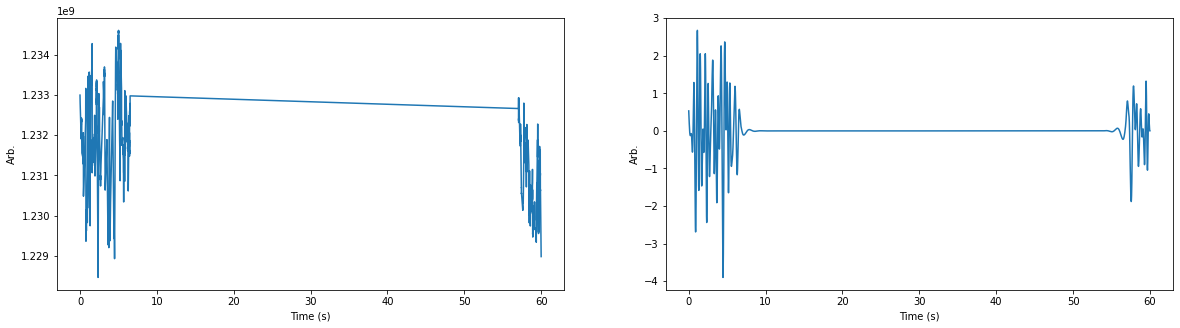

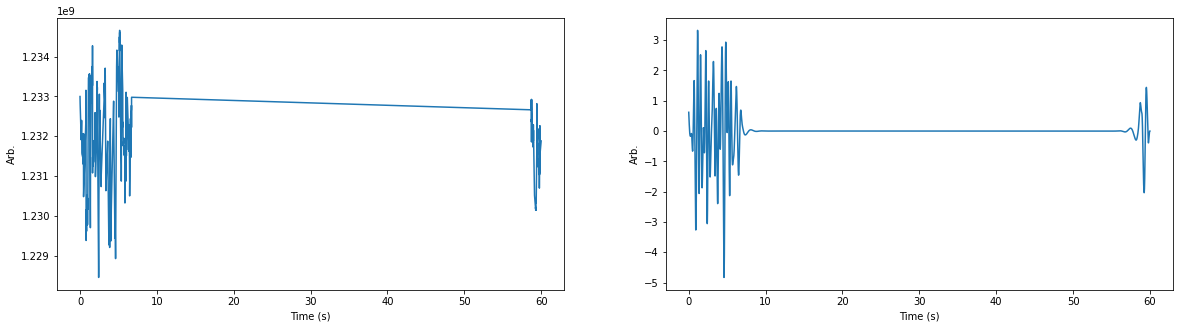

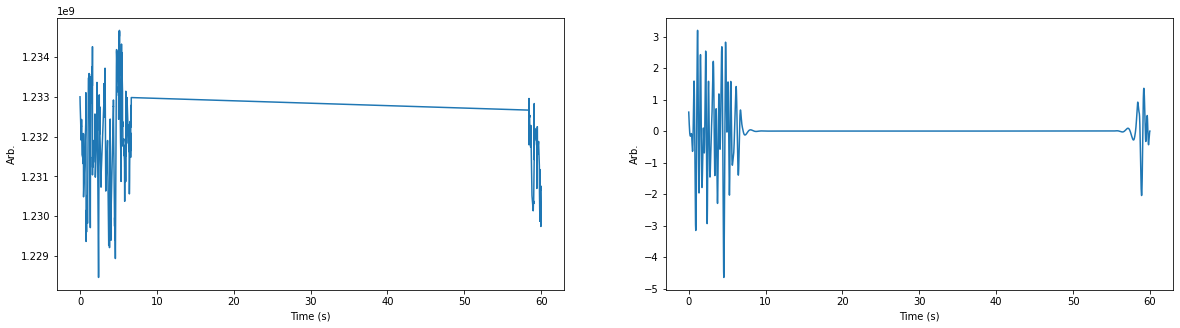

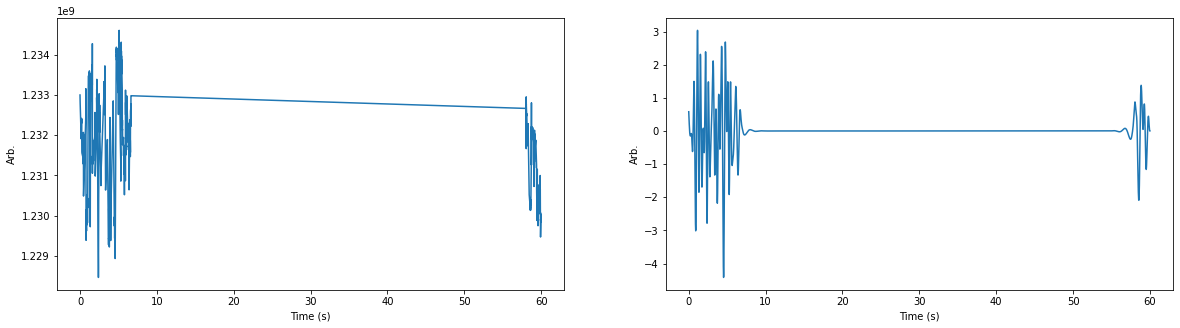

In [4]:
import heartpy as hp
for i in [1, 1.5, 2]:
    for j in ["stat", "jog", "star"]:
        for k in [1,2,3]:
            ppg_path = examples_path + f"{i}_{j}_{k}.csv"
            ppg = hr_eval.add_time_to_ppg(hr_eval.get_ppg_signal(ppg_path))
            low, high = 0,60
            index = (ppg["Time"] > low) & (ppg["Time"] < high)
            ppg = ppg[index]
            fig, ax = plt.subplots(ncols=2, figsize=(20,5))
            x = np.arange(low, high, 1/1000)
            y = np.interp(x, ppg["Time"], ppg["PPG"])

            #ax[0].plot(ppg["Time"], ppg["PPG"],label="Raw")
            ax[0].plot(x,y)
            ax[0].set_xlabel("Time (s)")
            ax[0].set_ylabel("Arb.")
            y = (y-np.mean(y))/np.std(y)
            sig = (ppg["PPG"]-np.mean(ppg["PPG"]))/np.std(ppg["PPG"])
            y = hp.filter_signal(y, [0.7, 3.5], sample_rate=1000, 
                                    order=3, filtertype='bandpass')
            ax[1].plot(x, y)
            ax[1].set_ylabel("Arb.")
            ax[1].set_xlabel("Time (s)")
# ax.plot(ppg["Time"], sig)
tikz.save(prep+"ppg.tex")

[  318   616  1544  3603  5011  6075  8500  8826  9324  9784 10624 10912
 11246 11781 12911 14023 16157 17190 18204 19229]
60.0
LEN: 1942


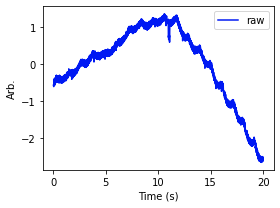

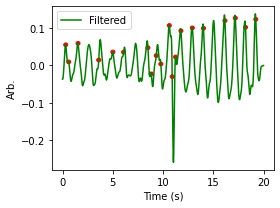

In [104]:
import biosppy
import matplotlib.cm as cm
from matplotlib.patches import Ellipse, Circle
# ppg_path = examples_path + f"2_jog_3.csv"
ppg_path = examples_path + f"1_stat_1.csv"
ppg = hr_eval.add_time_to_ppg(hr_eval.get_ppg_signal(ppg_path))
low, high = 40,60
index = (ppg["Time"] > low) & (ppg["Time"] < high)
ppg = ppg[index]
fig, ax = plt.subplots(figsize=(4,3))
x = np.arange(low, high, 1/1000)
y = np.interp(x, ppg["Time"], ppg["PPG"])
cmap = cm.get_cmap('winter')
y = (y-np.mean(y))/np.std(y)
#ax[0].plot(ppg["Time"], ppg["PPG"],label="Raw")
ax.plot(x-low,y, label="raw", color=cmap(0.1))
ax.legend()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Arb.")
plt.tight_layout()
plt.savefig(prep+"wear_1.pgf")
y = (y-np.mean(y))/np.std(y)
sig = (ppg["PPG"]-np.mean(ppg["PPG"]))/np.std(ppg["PPG"])
y = hp.filter_signal(y, [0.7, 3.5], sample_rate=1000, 
                        order=3, filtertype='bandpass')
rpeaks = biosppy.signals.ecg.engzee_segmenter(y)[0]
# ppg_hr.append(mean_heart_rate(signal, ppg_sf))
print(rpeaks)
avg_hr = 60*len(rpeaks)/(high - low)
print(avg_hr)
print(f"LEN: {len(ppg)}")
# circles = ppg.iloc[rpeaks]
times = x[rpeaks]
points = y[rpeaks]
fig, ax = plt.subplots(figsize=(4,3))
for i in range(len(times)):
    ax.add_artist(Ellipse((times[i]-low, points[i]),0.4,0.01, color="r", label="heart beat"))
# a_circle = plt.Circle((circles["Time"], ), .5)

# ax[1].axis("equal")
ax.plot(x-low, y, label="Filtered", color="g")
ax.set_ylabel("Arb.")
ax.set_xlabel("Time (s)")
ax.legend()
ax.plot()
plt.tight_layout()
plt.savefig(prep+"wear_2.pgf")
# ax.plot(ppg["Time"], sig)
tikz.clean_figure()
# tikz.save(prep+"wear_ppg.tex", axis_width='10cm', axis_height='10cm', textsize=8)
# plt.savefig(prep+"wear_ppg.pgf")


In [ ]:
haar_detector()

# Implementation

In [4]:
impl_path = "/Users/yousuf/Workspace/dissertation/report/implementation/"

In [2]:
import cv2 as cv
import sys
sys.path += ["/Users/yousuf/Workspace/dissertation/code/rPPG/python/core/"]
from face_det import DNNDetector
from region_selection import IntervalSkinDetector, RepeatedKMeansSkinDetector, BayesianSkinDetector
import helper
faceCascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
def haar_detector(image):
  cropped_images = []
  gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.05,
    minNeighbors=5,
    minSize=(1,1),
    flags = cv.CASCADE_SCALE_IMAGE
  )
  return faces

def _draw_rectangle(image, faces):
    for (x, y, w, h) in faces:
        x,y,w,h = int(x),int(y),int(w),int(h)
        cv.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return image

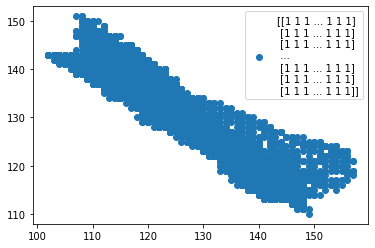

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
cmap = cm.get_cmap('jet')
for ti in helper.get_test_images()[:1]:
    yc = cv.cvtColor(ti, cv.COLOR_BGR2YCrCb)
    rksd = RepeatedKMeansSkinDetector()
    labels,mean = rksd.detect(ti)
    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(yc[:,:,1], yc[:,:,2], label=labels)#, color=cmap(labels))
    ax.legend()

In [4]:
def max_face(faces):
    r_x,r_y,r_w,r_h = 0,0,0,0
    for x,y,w,h in faces:
        if w*h > r_w*r_h:
            r_x,r_y,r_w,r_h = x,y,w,h
    return r_x,r_y,r_w,r_h

In [5]:
def conv(mask):
    mask = 255*mask
    h,w = mask.shape
    img = np.zeros(shape=(h,w,3))
    for i in range(3):
        img[:,:,i] = mask
    return img

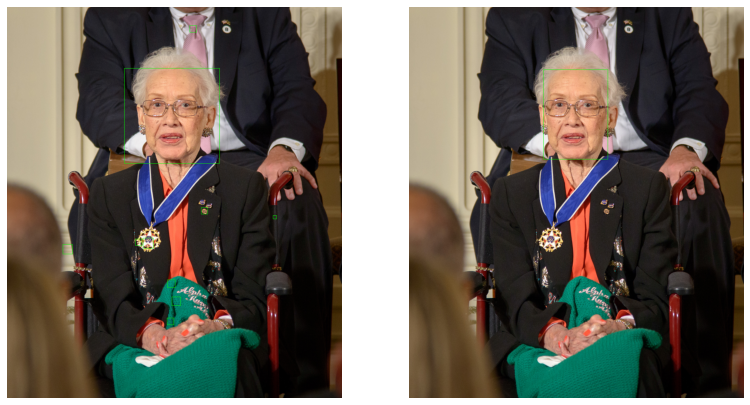

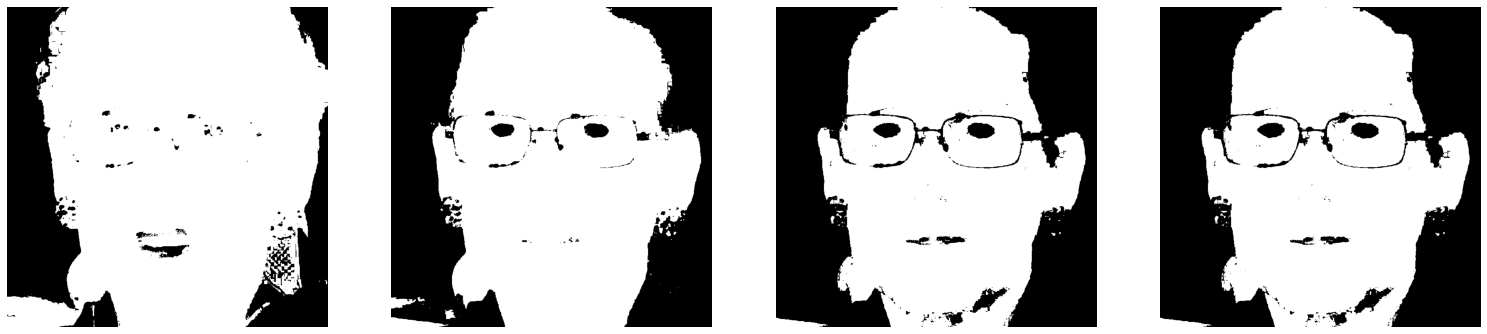

Frame: 0, time to find skin tone: 1.542630910873413


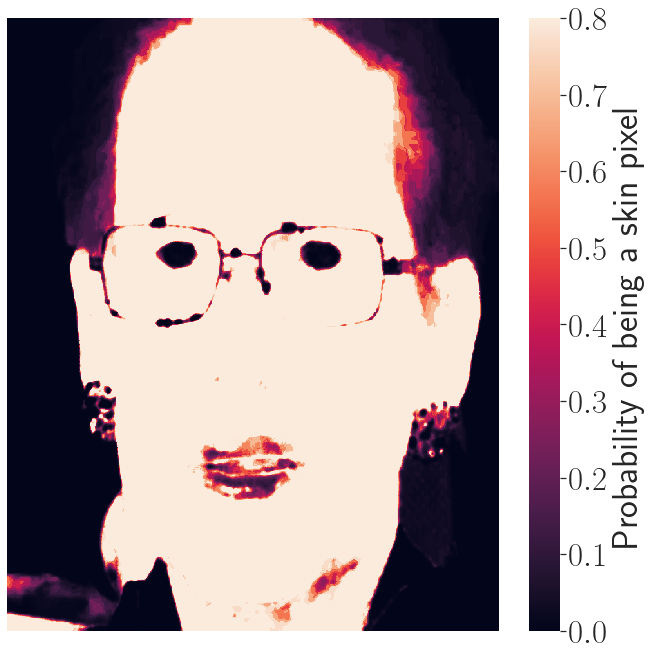

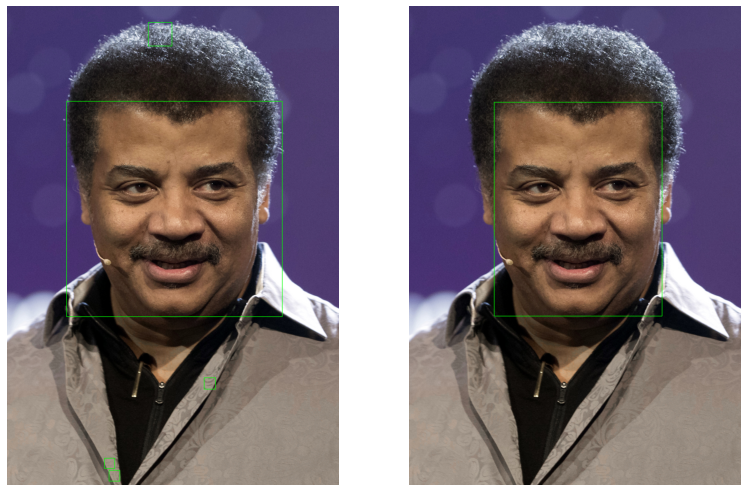

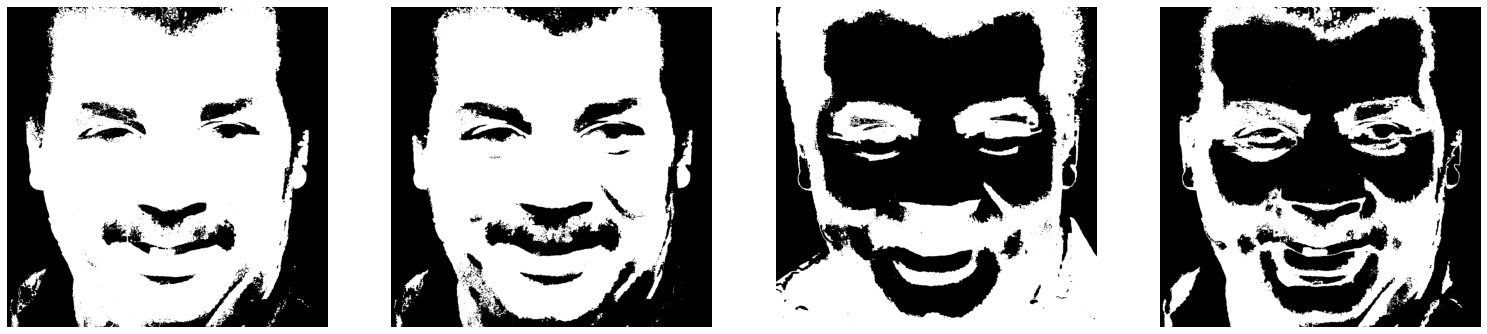

Frame: 0, time to find skin tone: 2.8618130683898926


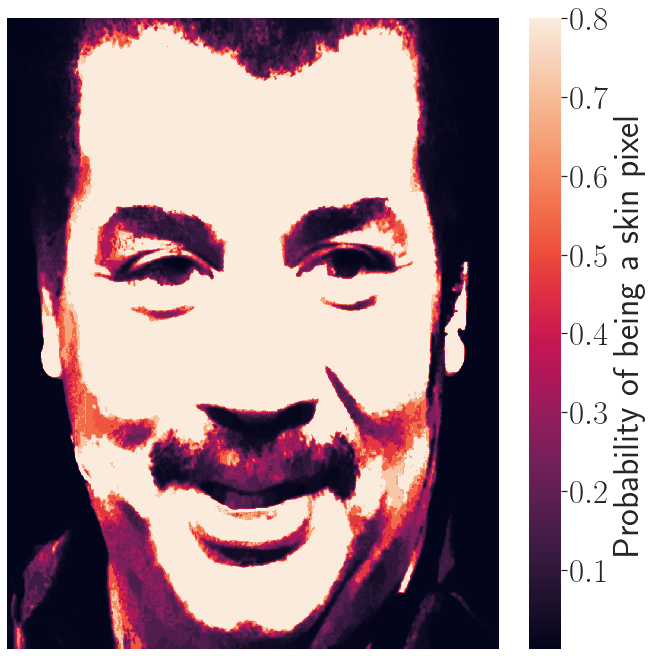

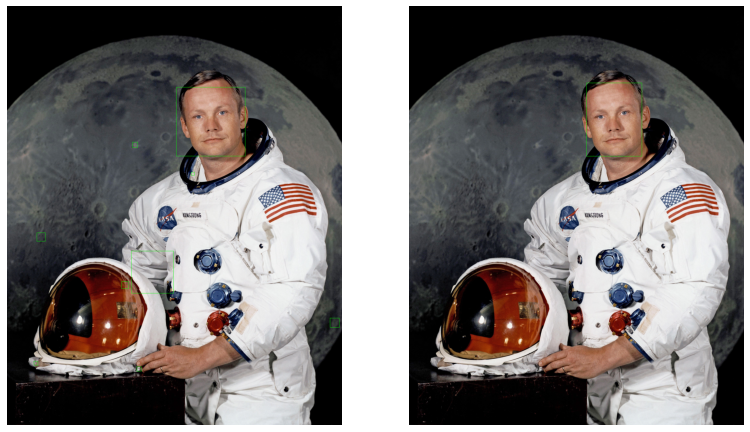

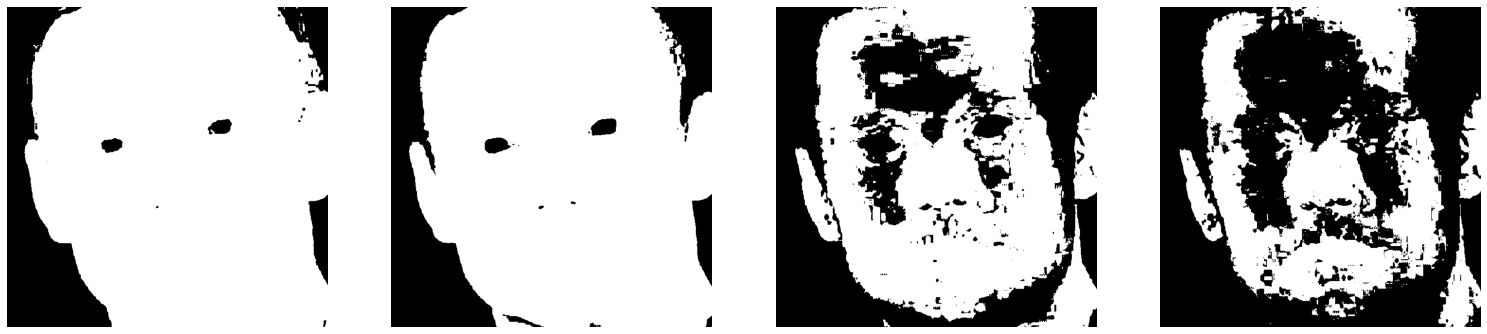

Frame: 0, time to find skin tone: 1.4469239711761475


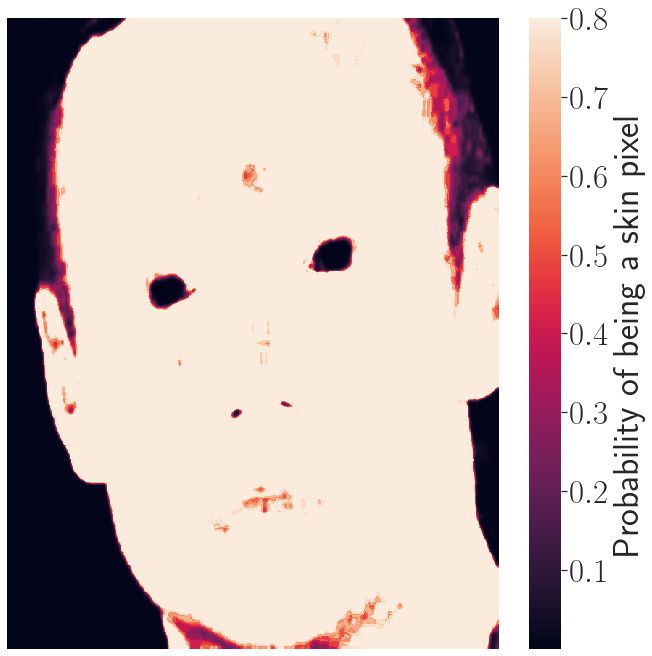

In [6]:
from matplotlib import rc
import numpy as np
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
for index, test_image in enumerate(helper.get_eval_images()):

    (x,y,w,h) = DNNDetector().detect_face(test_image)[0]
    faces = haar_detector(test_image)
    cv.imwrite(impl_path+f"ti-{index}.jpg", test_image)
    (x,y,w,h) = max_face(faces)
    cropped = test_image[y:y+h, x:x+w]
    cv.imwrite(impl_path+f"c-{index}.jpg", cropped)

    helper.show_images_plt([_draw_rectangle(test_image.copy(), faces), _draw_rectangle(test_image.copy(), DNNDetector().detect_face(test_image))])
    isd, rksd, bsd = IntervalSkinDetector(), RepeatedKMeansSkinDetector(), BayesianSkinDetector()
    i,r2,r3,r4 = isd.detect(cropped)[0], rksd.detect(cropped)[0], rksd.detect(cropped, 3)[0], rksd.detect(cropped, 4)[0]
    masks = [i,r2,r3,r4]
    masks = [255*i for i in masks]
#     images_masks = 
    cv.imwrite(impl_path+f"interval-{index}.jpg", conv(i))
    cv.imwrite(impl_path+f"r2-{index}.jpg", conv(r2))
    cv.imwrite(impl_path+f"r3-{index}.jpg", conv(r3))
    cv.imwrite(impl_path+f"r4-{index}.jpg", conv(r4))
    helper.show_images_plt(masks)
    helper.display_heatmap([bsd.detect(cropped)[0]])


In [ ]:
import time
ti = helper.get_test_images()[0]
bsd = BayesianSkinDetector()
bsd_res = []
rksd_res = []
size = 30
for i in range(1, size):
    bsd_times = []
    for _ in range(i):
        start = time.time()
        bsd.detect(ti)
        end = time.time()
        bsd_times.append(end-start)
    bsd_res.append(bsd_times)

    rksd = RepeatedKMeansSkinDetector() 
    rksd_times = []
    for _ in range(i):
        start = time.time()
        rksd.detect(ti)
        end = time.time()
        rksd_times.append(end-start)
    rksd_res.append(rksd_times)

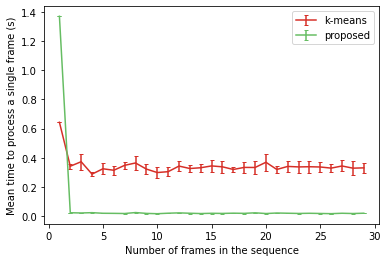

In [19]:
import numpy as np
import matplotlib.cm as cm
cmap = cm.get_cmap("RdYlGn")
fig, ax = plt.subplots(figsize=(6,4))
# rksd_res = 
ax.errorbar(np.arange(1, size), [np.mean(i) for i in rksd_res], yerr=[np.std(i) for i in rksd_res], color=cmap(0.1), capsize=2, label="k-means")
ax.errorbar(np.arange(1, size), [np.mean(i) for i in bsd_res], yerr=[np.std(i) for i in bsd_res],  color=cmap(0.8), capsize=2, label="proposed")
ax.set_ylabel("Mean time to process a single frame (s)")
ax.set_xlabel("Number of frames in the sequence")
ax.legend()
plt.savefig("bayesian.pgf")
# ax.errorbar(rel.index, rel["Redetection rate"], yerr=rel["Redetection rate std"], fmt='o', color=cmap(0.2), ecolor='lightgray', elinewidth=3, capsize=1, label=s)

In [7]:
rksd_res

[[],
 [0.5639958381652832],
 [0.3272073268890381, 0.2850520610809326],
 [0.31320691108703613, 0.2759077548980713, 0.31508874893188477],
 [0.2910799980163574,
  0.31375789642333984,
  0.3172171115875244,
  0.31619787216186523],
 [0.3260462284088135,
  0.27611422538757324,
  0.31185102462768555,
  0.2658991813659668,
  0.331470251083374],
 [0.3178880214691162,
  0.26401424407958984,
  0.27191710472106934,
  0.2564971446990967,
  0.33209872245788574,
  0.3205430507659912],
 [0.32314014434814453,
  0.31530189514160156,
  0.27608394622802734,
  0.2737600803375244,
  0.31472325325012207,
  0.3031010627746582,
  0.3315908908843994],
 [0.2937319278717041,
  0.33729100227355957,
  0.3280189037322998,
  0.2869241237640381,
  0.3139042854309082,
  0.3436398506164551,
  0.30687499046325684,
  0.2823641300201416],
 [0.30512523651123047,
  0.3258218765258789,
  0.29959583282470703,
  0.24086213111877441,
  0.2548558712005615,
  0.30639100074768066,
  0.3297140598297119,
  0.3200509548187256,
  0.278

In [8]:
bsd_res

[[],
 [1.636003017425537],
 [0.02003192901611328, 0.01896190643310547],
 [0.02118229866027832, 0.018335819244384766, 0.01715993881225586],
 [0.017885923385620117,
  0.019264936447143555,
  0.016651630401611328,
  0.018342018127441406],
 [0.018641948699951172,
  0.018924951553344727,
  0.017819881439208984,
  0.017609119415283203,
  0.017180919647216797],
 [0.015989065170288086,
  0.01819014549255371,
  0.01897907257080078,
  0.01911187171936035,
  0.016579866409301758,
  0.01772785186767578],
 [0.01552581787109375,
  0.016079187393188477,
  0.014267921447753906,
  0.013677835464477539,
  0.013992786407470703,
  0.014286994934082031,
  0.014188051223754883],
 [0.01842188835144043,
  0.01747584342956543,
  0.01740574836730957,
  0.018007993698120117,
  0.017271995544433594,
  0.017124176025390625,
  0.01641082763671875,
  0.01560521125793457],
 [0.017889976501464844,
  0.0168459415435791,
  0.017755985260009766,
  0.017128944396972656,
  0.016205787658691406,
  0.016403913497924805,
  0.

In [91]:
impl_path="/Users/yousuf/Workspace/dissertation/report/implementation/"

In [4]:
import numpy as np
stat = "/Users/yousuf/Workspace/dissertation/code/rPPG/output/hr_evaluation/2_stat_1-KLTBoxingWithThresholding-DNNDetector-BayesianSkinDetector-weighted-fixed.csv"
star = "/Users/yousuf/Workspace/dissertation/code/rPPG/output/hr_evaluation/2_star_1-RepeatedDetector-DNNDetector-PrimitiveROI-fixed.csv"
jog = "/Users/yousuf/Workspace/dissertation/code/rPPG/output/hr_evaluation/2_jog_1-RepeatedDetector-DNNDetector-PrimitiveROI-fixed.csv"

stat = np.loadtxt(stat)
star = np.loadtxt(star)
jog = np.loadtxt(jog)


In [116]:
import scipy
from sklearn.decomposition import FastICA
def sample_framerate(ppg, fr, true_fr):
    xs = np.arange(0, len(ppg), true_fr/fr)
    ups = np.zeros(shape=(len(xs), 3))
    # print("Shape")
    # print(ups.shape)
    # print(f"Truefr:{true_fr}, fr: {fr}, ppg: {len(ppg)}")
    for i in range(3):
        ups[:,i] = np.interp(xs, np.arange(0, len(ppg)), ppg[:,i])
    return ups

def fft(data, framerate):
    transform = np.fft.rfft(data)
    freqs = np.fft.rfftfreq(len(data), 1.0/framerate)   
    freqs = 60*freqs
    band_pass = np.where((freqs < 40) | (freqs > 240) )[0]
    transform[band_pass] = 0
    transform = np.abs(transform)**2
    sos = scipy.signal.butter(3, 0.2, output='sos')
#     transform = scipy.signal.sosfilt(sos, transform)
    powers = np.argsort(-1*transform)
    return transform

def noise(data, framerate, true_hr):
    if true_hr is None:
        return None

    data = (data-np.mean(data))/np.std(data)
    transform = np.fft.rfft(data)
    freqs = np.fft.rfftfreq(len(data), 1.0/framerate)
    freqs = 60*freqs
    delta = 4
    band_pass = np.where((freqs < 40) | (freqs > 240) )[0]
    transform[band_pass] = 0
    # hr_range = np.where((freqs > 40) & (freqs < 240) & (freqs > (true_hr + delta)) & (freqs < ((true_hr - delta))))[0]
    lower = (freqs > (true_hr + delta))
    upper = (freqs < (true_hr - delta))
    hr_range = np.where(lower | upper)[0]
    transform = np.abs(transform)**2
    noise_value = np.sum(transform[hr_range])
    # print(f"Noise value {noise_value}")
    # print(f"{np.sum(transform[~hr_range])}")
    numerator = np.sum(transform)-np.sum(transform[hr_range])
    return numerator/np.sum(transform)
#     print(np.sum(transform[~hr_range]))
#     return np.sum(transform[~hr_range])/np.sum(transform)
#     return noise_value/np.sum(transform)
    # return noise_value/np.sum(transform[~hr_range])
    # return np.sum(transform[~hr_range])/noise_value
    # return noise_value
def ica(data):
    f_ica = FastICA(n_components=3, max_iter=40000)
    signals = f_ica.fit_transform(data)
    return signals

In [75]:
for i,s in enumerate([stat, star, jog]):
    print(noise(s[:,0], 30, true_hrs[i]))
# noise(stat[:,0], 30, true_hrs[0])

0.15262043274180623
0.6071004039258163
0.011592121052574986


(40.0, 240.0)

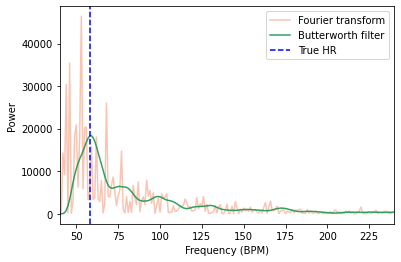

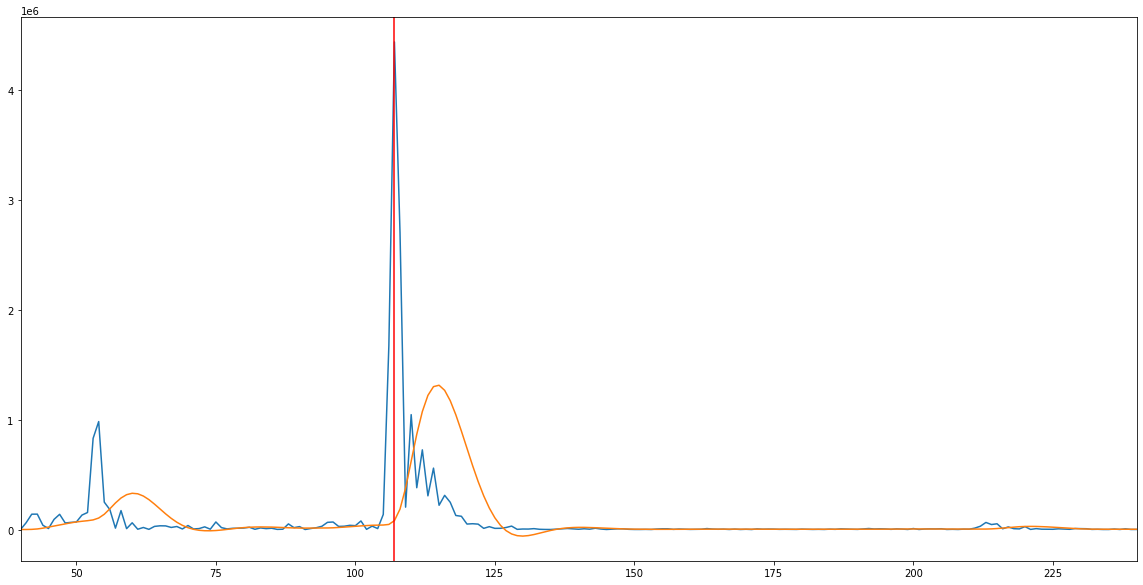

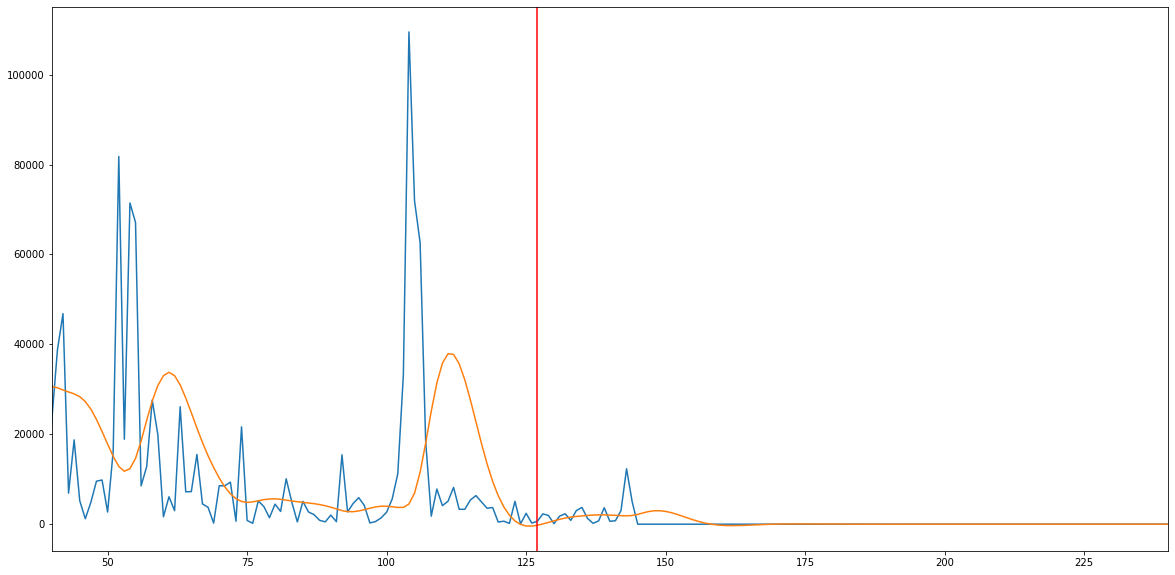

In [110]:
import matplotlib.cm as cm
true_hrs = [58, 107, 127]
sos = scipy.signal.butter(3, 0.1, output='sos')
fig, ax = plt.subplots(figsize=(6,4))
t = fft(stat[:,0], 30)
tr = scipy.signal.sosfilt(sos, t)
cmap = cm.get_cmap("RdYlGn")
ax.plot(t, label="Fourier transform", color=cmap(0.2), alpha=0.4)
ax.plot(tr, label="Butterworth filter", color=cmap(0.9), alpha=0.9)
ax.axvline(58, color="b", label="True HR", ls="--")
ax.set_xlim(40, 240)
ax.set_xlabel("Frequency (BPM)")
ax.set_ylabel("Power")
ax.legend()
plt.savefig(impl_path+"butterworth.pgf")

fig, ax = plt.subplots(figsize=(20,10))
t = fft(star[:,0], 30)
tr = scipy.signal.sosfilt(sos, t)
ax.plot(t)
ax.plot(tr)
ax.axvline(107, color="r")
ax.set_xlim(40, 240)

fig, ax = plt.subplots(figsize=(20,10))
lim = int(0.6*len(jog))
t = fft(jog[:lim,2], 30)
tr = scipy.signal.sosfilt(sos, t)
ax.plot(t)
ax.plot(tr)
ax.axvline(127, color="r")
ax.set_xlim(40, 240)
# plt.plot(fft(jog[:,0], 30))

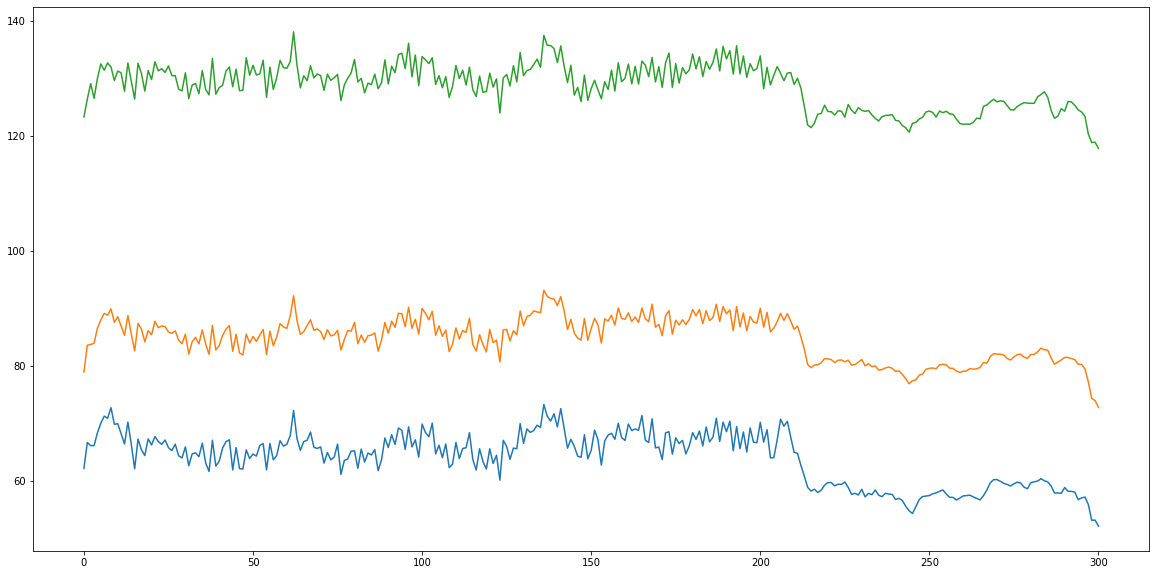

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(sample_framerate(jog, 5, 30))


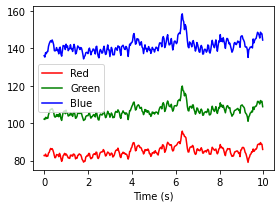

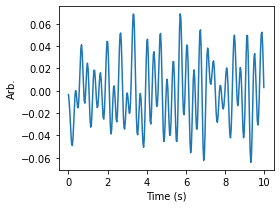

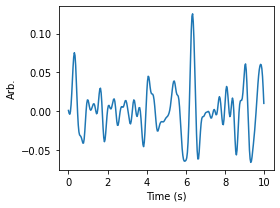

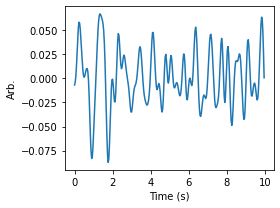

In [136]:
import heartpy 
size = (4,3)
# for d in [stat,star,jog]:
for d in [jog]:
    fig, ax = plt.subplots(figsize=size)
    lim = 400
    d = d[100:lim, :]
    t = np.arange(0, 1/30*300, 1/30)
    cs = ["r", "g", "b"]
    lbs = ["Red", "Green", "Blue"]
    for i in range(3):
        ax.plot(t, d[:, i], color=cs[i], label=lbs[i])
#     ax.plot(t, d)
    ax.set_xlabel("Time (s)")
    ax.legend()
    plt.tight_layout()
    plt.savefig(impl_path+"ica_0.pgf")
    sig = ica(d)
    for i in range(3):
        sig[:,i] = hp.filter_signal(sig[:,i], [0.7, 3.5], sample_rate=30, 
                            order=3, filtertype='bandpass')
    fig, ax = plt.subplots(figsize=size)
    ax.plot(t, sig[:,0])
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Arb.")
    plt.tight_layout()
    plt.savefig(impl_path+"ica_1.pgf")
    fig, ax = plt.subplots(figsize=size)
    ax.plot(t, sig[:,1])
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Arb.")
    plt.tight_layout()
    plt.savefig(impl_path+"ica_2.pgf")
    fig, ax = plt.subplots(figsize=size)
    ax.plot(t, sig[:,2])
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Arb.")
    plt.tight_layout()
    plt.savefig(impl_path+"ica_3.pgf")

In [9]:
gif_path = "/Users/yousuf/Workspace/dissertation/code/examples/gifs/stat/"

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation
# font = {'family':'Monaco'}
# matplotlib.rc('font', **font)
plt.style.use('seaborn-pastel')
rc('text', usetex=True)
h,w = jog.shape
for index, i in enumerate(range(50, h, 50)):
    fig, ax = plt.subplots(figsize=(4,3))
    x = 1/30*np.arange(0, i)
    ax.plot(x, stat[:i, :])
    ax.set_ylabel("Arb.")
    ax.set_xlabel("Time (s)")
    ax.title.set_text("RGB values")
    plt.tight_layout()
    plt.savefig(f"{gif_path}{index}.png")
    plt.close()